In [1]:
from fastai.vision import *
from fastai import *
import fastai

In [35]:
root = "classification_fai/"

In [3]:
data = ImageDataBunch.from_folder(path=root, 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(do_flip=True,flip_vert=True,p_affine=0.5, max_rotate=10.0),
                                 size=120,bs=4,
                                 ).normalize(imagenet_stats)

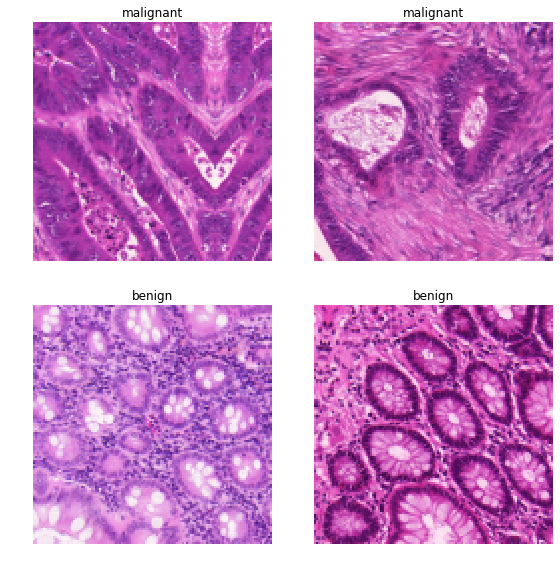

In [4]:
data.show_batch(rows=3)

In [5]:
learn = create_cnn(data,models.resnet34, metrics=accuracy)

/home/sam/anaconda3/envs/work/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


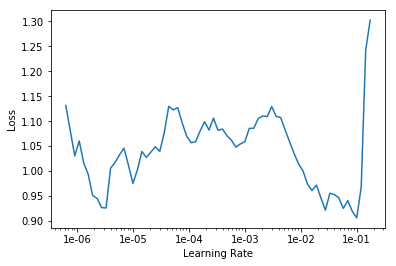

In [6]:
learn.lr_find()
learn.recorder.plot()

In [7]:
learn.fit_one_cycle(5,max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,1.043417,0.727143,0.484848,00:03
1,1.145247,0.783056,0.515152,00:03
2,0.969938,0.733667,0.575758,00:03
3,0.978112,0.716996,0.575758,00:03
4,0.957042,0.745624,0.575758,00:03


In [8]:
learn.save('dent-v1')

In [9]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


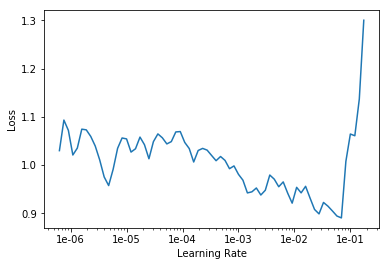

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(10,max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.919169,0.720967,0.545455,00:05
1,0.879456,0.674148,0.636364,00:05
2,0.926005,0.667026,0.545455,00:05
3,0.957668,0.666374,0.636364,00:06
4,0.882435,0.620263,0.666667,00:06
5,0.881784,0.683620,0.575758,00:06
6,0.902590,0.548059,0.666667,00:06
7,0.872568,0.632929,0.666667,00:06
8,0.826043,0.606390,0.606061,00:06
9,0.834712,0.623468,0.696970,00:06


In [12]:
learn.save('dent-v2')

In [13]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


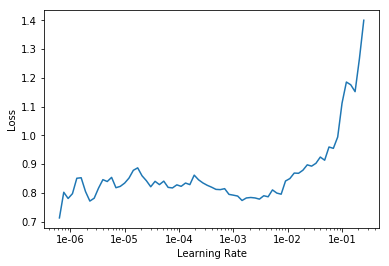

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(10, max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.867865,0.609120,0.666667,00:05
1,0.733060,0.607782,0.666667,00:05
2,0.706995,0.631569,0.696970,00:05
3,0.753174,0.571723,0.727273,00:06
4,0.762016,0.505271,0.727273,00:06
5,0.830840,0.467308,0.727273,00:06
6,0.794706,0.585778,0.727273,00:06
7,0.811811,0.578634,0.696970,00:06
8,0.795762,0.566579,0.757576,00:06
9,0.738706,0.571490,0.666667,00:06


In [16]:
learn.save('dent-v3')

In [17]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


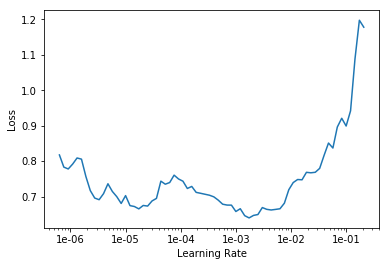

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(10, max_lr=slice(1e-05,1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.823890,0.457097,0.727273,00:05
1,0.781907,0.504868,0.696970,00:05
2,0.696881,0.375264,0.818182,00:05
3,0.645895,0.348076,0.848485,00:06
4,0.550196,0.324328,0.848485,00:06
5,0.568929,0.281322,0.848485,00:06
6,0.510716,0.235074,0.909091,00:06
7,0.535741,0.194937,0.969697,00:06
8,0.518413,0.186680,0.969697,00:06
9,0.498886,0.168028,0.969697,00:06


In [20]:
learn.save('final-dent')

In [22]:
infer = ClassificationInterpretation.from_learner(learn)

In [23]:
infer.confusion_matrix()

array([[11,  1],
       [ 0, 21]])

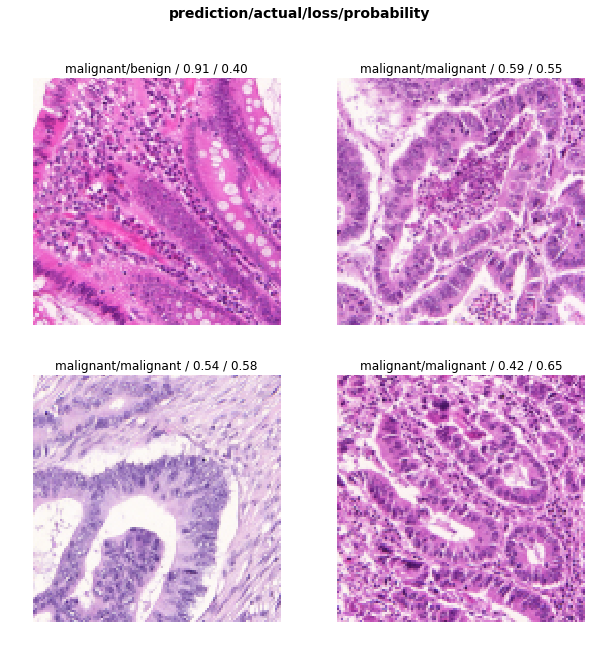

In [25]:
infer.plot_top_losses(4,figsize=(10,10))

In [62]:
te ='testing/'
# classes = ['benign','malignant']

In [36]:
data = ImageDataBunch.from_folder(path=root, 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(do_flip=True,flip_vert=True,p_affine=0.5, max_rotate=10.0),
                                 size=120,bs=4,
                                 ).normalize(imagenet_stats)

In [63]:
testing = ImageDataBunch.from_folder(path=te,
                                     valid_pct=0.0,
                                     ds_tfms = get_transforms(),
                                     size=120, bs=4).normalize(imagenet_stats)

In [64]:
learn = cnn_learner(testing,models.resnet34)

In [65]:
learn.load('/home/sam/Downloads/dentistry_dataset/warwick_qu_dataset_released_2016_07_08/final-dent')

Learner(data=ImageDataBunch;

Train: LabelList (32 items)
x: ImageList
Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120)
y: CategoryList
benign,benign,benign,benign,benign
Path: testing;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: testing;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

(Category benign, tensor(0), tensor([0.8776, 0.1224]))

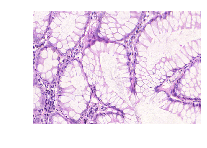

In [78]:
img = open_image('testing/benign/testA_1.bmp');
show_image(img)
learn.predict(img)

(Category malignant, tensor(1), tensor([0.0537, 0.9463]))

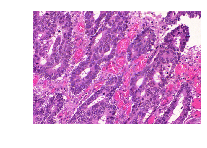

In [79]:
imgM = open_image('testing/malignant/testA_12.bmp');
show_image(imgM)
learn.predict(imgM)